# 통신사 이탈고객 예측 분류기 구현 실습

### 데이터셋 설명
- customerID: 고객ID  
- gender: 고객 성별  
- SeniorCitizen: 시니어 여부  
- Partner: 고객에게 파트너가 있는지 여부(결혼 여부)    
- Dependents: 고객의 부양 가족 여부  
- tenure: 고객이 회사에 머물렀던 개월 수  
- PhoneService: 고객에게 전화 서비스가 있는지 여부  
- MultipleLines: 고객이 여러 회선을 사용하는지 여부  
- InternetService: 고객의 인터넷 서비스 제공업체  
- OnlineSecurity: 고객의 온라인 보안 여부  
- OnlineBackup: 고객이 온라인 백업을 했는지 여부  
- DeviceProtection: 고객에게 기기 보호 기능이 있는지 여부  
- TechSupport: 고객이 기술 지원을 받았는지 여부  
- StreamingTV: 고객이 스트리밍TV을 가지고 있는지 여부  
- StreamingMovies: 고객이 영화를 스트리밍하는지 여부  
- Contract: 고객의 계약기간  
- PaperlessBilling: 고객의 종이 없는 청구서 수신 여부(모바일 청구서)  
- PaymentMethod: 고객의 결제 수단  
- MonthlyCharges: 매월 고객에게 청구되는 금액  
- TotalCharges: 고객에게 청구된 총 금액  
- Churn: 고객 이탈 여부, 종속 변수  

### 라이브러리 임포트

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

### AIDU 라이브러리 임포트, AIDU 데이터 디렉토리에서 데이터 로드

In [ ]:
# from aicentro.session import Session
# from aicentro.framework.keras import Keras as AiduFrm

# aidu_session = Session(verify=False)
# aidu_framework = AiduFrm(session=aidu_session)

# df = pd.read_csv(aidu_framework.config.data_dir + '/churn_data.csv')

### 데이터 로드

In [2]:
# df = pd.read_csv('churn_data.csv')
df = pd.read_csv('https://raw.githubusercontent.com/kgpark88/ai-summary/main/churn_data.csv')

In [3]:
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


### 데이터 분석

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


### 상관관계 분석

In [8]:
df.corr()

,SeniorCitizen,tenure,MonthlyCharges
SeniorCitizen,1.000000,0.016567,0.220173
tenure,0.016567,1.000000,0.247900
MonthlyCharges,0.220173,0.247900,1.000000


In [9]:
df.corr()['MonthlyCharges'].sort_values()

SeniorCitizen     0.220173
tenure            0.247900
MonthlyCharges    1.000000
Name: MonthlyCharges, dtype: float64

<AxesSubplot:>

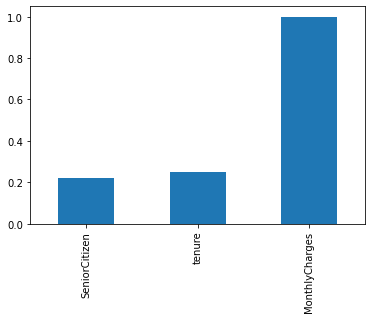

In [10]:
df.corr()['MonthlyCharges'].sort_values().plot(kind='bar')

<AxesSubplot:>

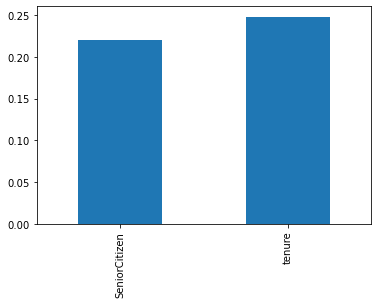

In [11]:
df.corr()['MonthlyCharges'][:-1].sort_values().plot(kind='bar')

<AxesSubplot:>

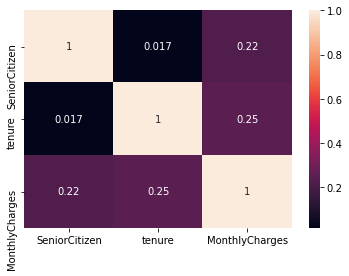

In [12]:
sns.heatmap(df.corr(), annot=True)

### 데이터 전처리

In [13]:
# df = pd.read_csv('churn_data.csv')
df = pd.read_csv('https://raw.githubusercontent.com/kgpark88/ai-summary/main/churn_data.csv')

In [14]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

###  유일한 데이터 customerID 컬럼은 제거

In [15]:
df.drop('customerID', axis=1, inplace=True)

### <font color='blue'>1. TotalCharges 컬럼의 공백값을 문자 '0'으로 변경하고 수치형 데이터 타입으로 변환하세요.</font>

In [16]:
df['TotalCharges'].replace([' '], ['0'], inplace=True)
df['TotalCharges'] = df['TotalCharges'].astype(float)

### 예측 변수값을 이진값 0, 1 로 변경

In [17]:
df['Churn'].replace(['Yes', 'No'], [1, 0], inplace=True)

### 카테고리 변수를 더미 변수로 변환

In [18]:
# df = pd.get_dummies(df)

In [19]:
cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

dummies = pd.get_dummies(df[cols], drop_first=True)

df = df.drop(cols, axis=1)

df = pd.concat([df, dummies], axis=1)

In [20]:
df.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

### <font color='blue'>2. 고객이탈여부 데이터를 변수 y에 할당하고 나머지 데이터를 변수 X에 할당하세요.</font>

In [21]:
y = df['Churn'].values
X = df.drop('Churn', axis=1).values

### <font color='blue'>3. X, y 데이터셋을 70%:30% 비율로 훈련데이터셋과 검증데이터셋으로 분할하세요.</font>

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,  stratify=y, random_state=42)

In [23]:
print(X_train.shape)

(4930, 30)


In [24]:
print(X_test.shape)

(2113, 30)


### <font color='blue'>4. 랜덤 포레스트 모델로 이탈고객 분류예측기를 만들고 모델성능을 출력하세요.</font>

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# 모델 학습
rfc = RandomForestClassifier(n_estimators=50, max_depth=3, random_state=42)
rfc.fit(X_train, y_train)

# 예측
pred = rfc.predict(X_test)
print('예측값: ', pred[:10])

# 모델 성능 평가
accuracy = accuracy_score(y_test, pred)
print("Accuracy: {:.4f}".format(accuracy))

예측값:  [0 0 0 0 0 0 0 0 0 0]
Accuracy: 0.7804


### <font color='blue'>5. XGBoost 모델로 이탈고객 분류예측기를 만들고 모델성능을 출력하세요.</font>

In [26]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# 모델 학습 
xgbc = XGBClassifier(n_estimators=50, max_depth=3, random_state=42)
xgbc.fit(X_train, y_train)

# 예측
pred = xgbc.predict(X_test)
print('예측값: ', pred[:10])

# 모델 성능 평가
accuracy = accuracy_score(y_test, pred) 
print(f'Mean accuracy score: {accuracy:.4}')

[20:15:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
예측값:  [1 0 1 0 0 0 0 0 0 0]
Mean accuracy score: 0.7974


c:\users\danny\.conda\envs\tfenv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


### <font color='blue'>6. Light GBM 모델로 이탈고객 분류예측기를 만들고 accuracy score 와 confusion matrix 값을 출력하세요.</font>

In [27]:
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix 

# 모델 학습 
lgbc = LGBMClassifier(n_estimators=50, max_depth=3, random_state=42)
lgbc.fit(X_train, y_train)

# 예측
y_pred = lgbc.predict(X_test)
print('예측값: ', pred[:10])

# 모델 성능 평가
accuracy = accuracy_score(y_test, pred) 
print(f'Mean accuracy score: {accuracy:.4}')
print(confusion_matrix(y_test, y_pred))

예측값:  [1 0 1 0 0 0 0 0 0 0]
Mean accuracy score: 0.7974
[[1412  140]
 [ 289  272]]
